Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')
movies_df


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [3]:
# remove irrelevant columns from data set
movies_df.drop( ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'],axis=1, inplace= True)
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Remove any duplicate rows

In [4]:
# remove any duplicate rows from the data set

movies_df.drop_duplicates(inplace = True)


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Remove rows with 0 budget or revenue

movies_df = movies_df[movies_df.revenue != 0]
movies_df = movies_df[movies_df.budget != 0]


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [6]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format= '%Y-%m-%d')

# Extract the release year from every release date
movies_df['release_year'] = pd.DatetimeIndex(movies_df['release_date']).year


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [7]:
# convert budget and revenue to int data format

movies_df = movies_df.astype({'budget': 'int', 'revenue' : 'int'})
movies_df.dtypes

budget                           int32
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int32
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [8]:
def parse_col_json(df, column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(df.index,df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        df.loc[index,column]=str(list1)
    
  
    
parse_col_json(movies_df,'genres', 'name')
parse_col_json(movies_df, 'spoken_languages', 'name')
parse_col_json(movies_df, 'production_countries', 'name')
movies_df.astype({'budget': 'int', 'revenue' : 'int'}).dtypes
movies_df.genres.head(5)


0    ['Action', 'Adventure', 'Fantasy', 'Science Fi...
1                   ['Adventure', 'Fantasy', 'Action']
2                     ['Action', 'Adventure', 'Crime']
3             ['Action', 'Crime', 'Drama', 'Thriller']
4           ['Action', 'Adventure', 'Science Fiction']
Name: genres, dtype: object

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

[Text(0, 0.5, '')]

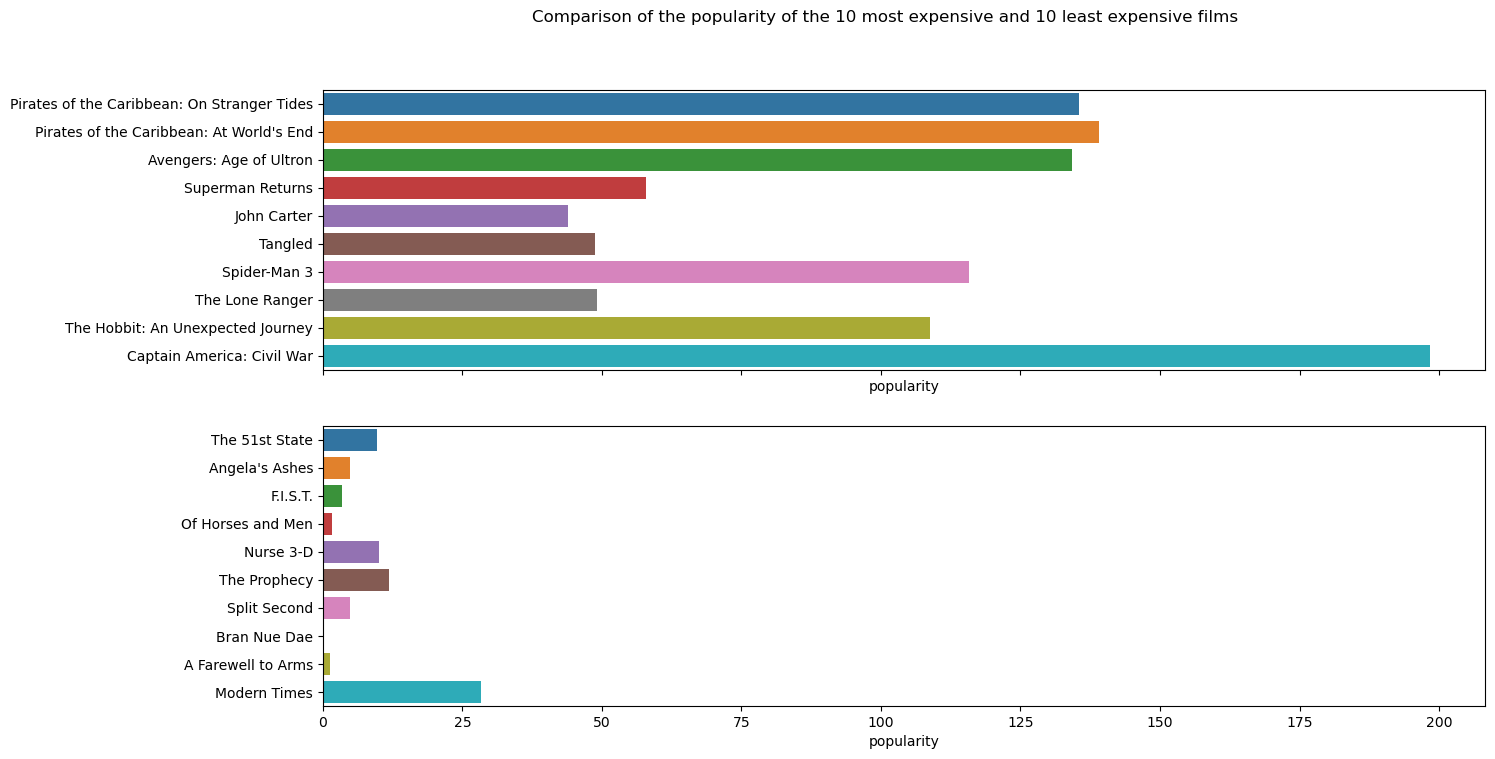

In [9]:
# create data frames for the most and least expensive films
most_expensive = movies_df.sort_values('budget',ascending = False).head(10)
least_expensive = movies_df.sort_values('budget',ascending = False).tail(10)


# create a bar plot of their popularity 
fig, axes = plt.subplots(2, 1, figsize=(15, 8),sharex= True)
fig.suptitle('Comparison of the popularity of the 10 most expensive and 10 least expensive films')
sns.barplot(data= most_expensive, y='title', x= 'popularity', ax=axes[0]).set(ylabel= '')
sns.barplot(data= least_expensive, y='title', x= 'popularity', ax=axes[1]).set(ylabel= '')


[Text(0, 0.5, '')]

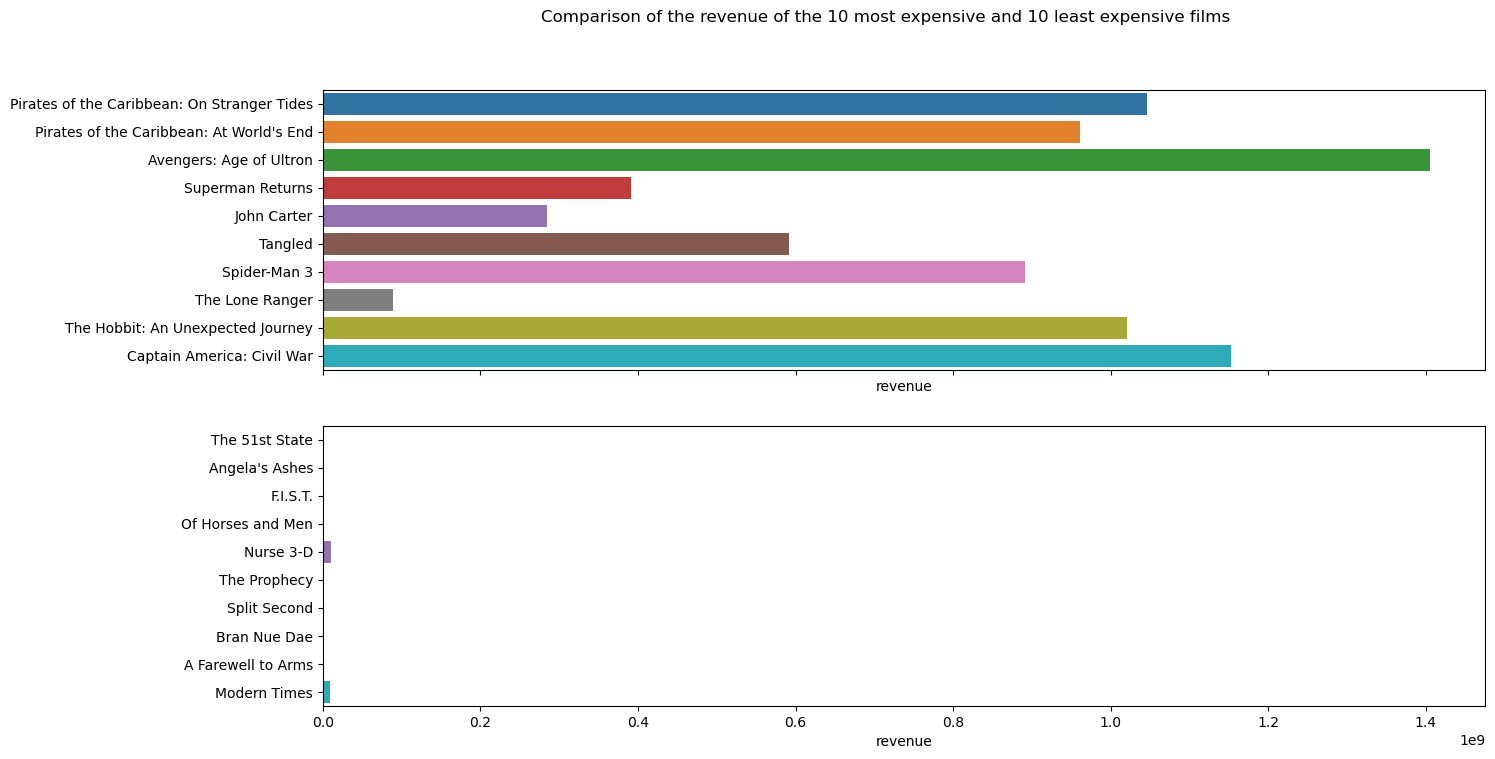

In [10]:
# create a bar plot of the revenue
fig, axes = plt.subplots(2, 1, figsize=(15, 8),sharex= True)
fig.suptitle('Comparison of the revenue of the 10 most expensive and 10 least expensive films')
sns.barplot(data= most_expensive, y='title', x= 'revenue', ax=axes[0]).set(ylabel= '')
sns.barplot(data= least_expensive, y='title', x= 'revenue', ax=axes[1]).set(ylabel= '')

[Text(0, 0.5, '')]

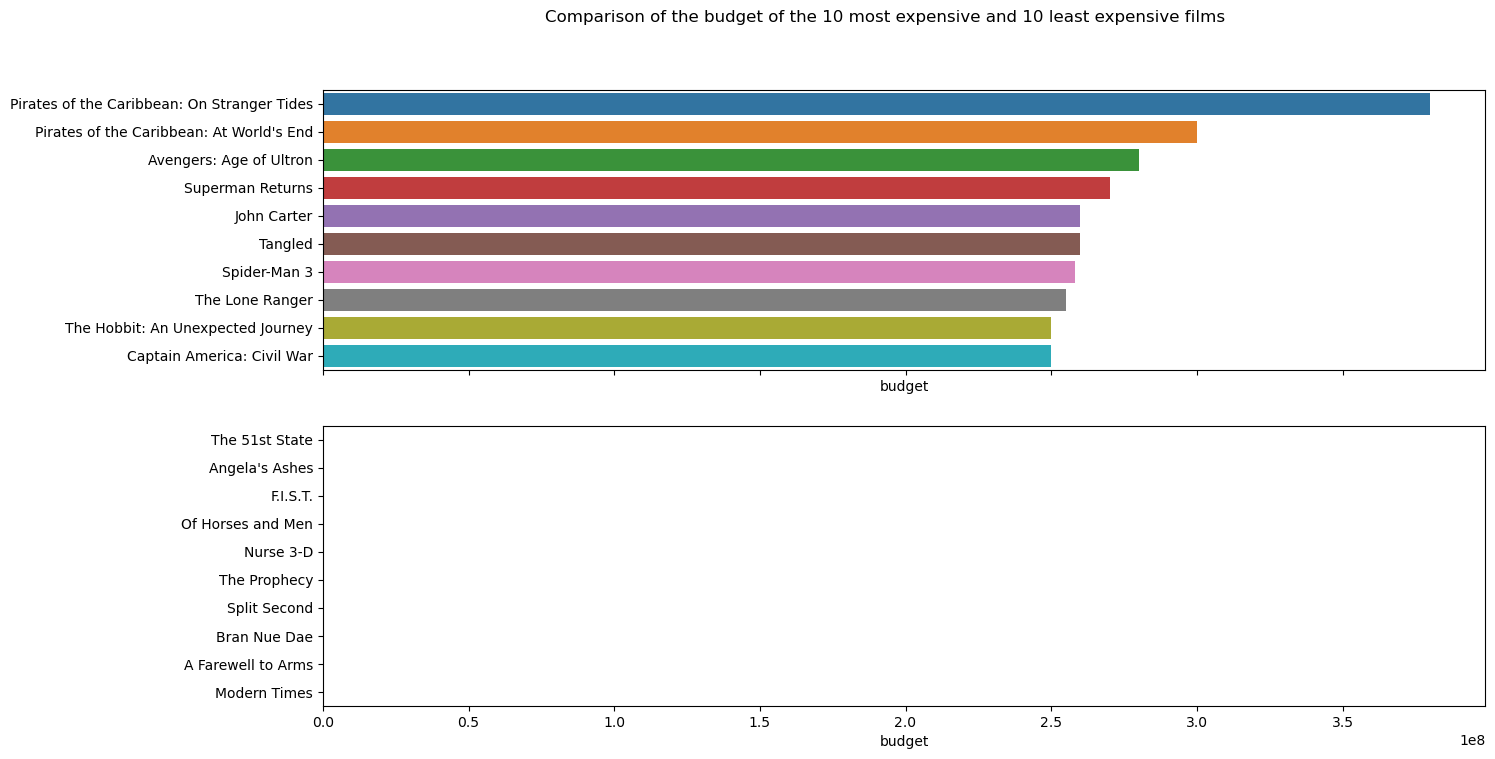

In [27]:
# create a bar plot of their budgets
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex= True)
fig.suptitle('Comparison of the budget of the 10 most expensive and 10 least expensive films')
sns.barplot(data= most_expensive, y='title', x= 'budget', ax=axes[0]).set(ylabel= '')
sns.barplot(data= least_expensive, y='title', x= 'budget', ax=axes[1]).set(ylabel= '')

#### 5 Most expensive movies:


In [12]:
most_expensive.title.head(5)

17    Pirates of the Caribbean: On Stranger Tides
1        Pirates of the Caribbean: At World's End
7                         Avengers: Age of Ultron
10                               Superman Returns
4                                     John Carter
Name: title, dtype: object

#### Cheapest and most expensive compared:
The most expensive movies have such greater budgets and revenues that in comparison to the least expensive they are practically zero

When you compare the popularity though its slightly more even with there not being such a huge gap between the films, Modern times the least expensive movie in the data set is the most popular which is half as popular as John Carter which is impressive considering the vast differences in the budgets of the two films

[Text(0, 0.5, '')]

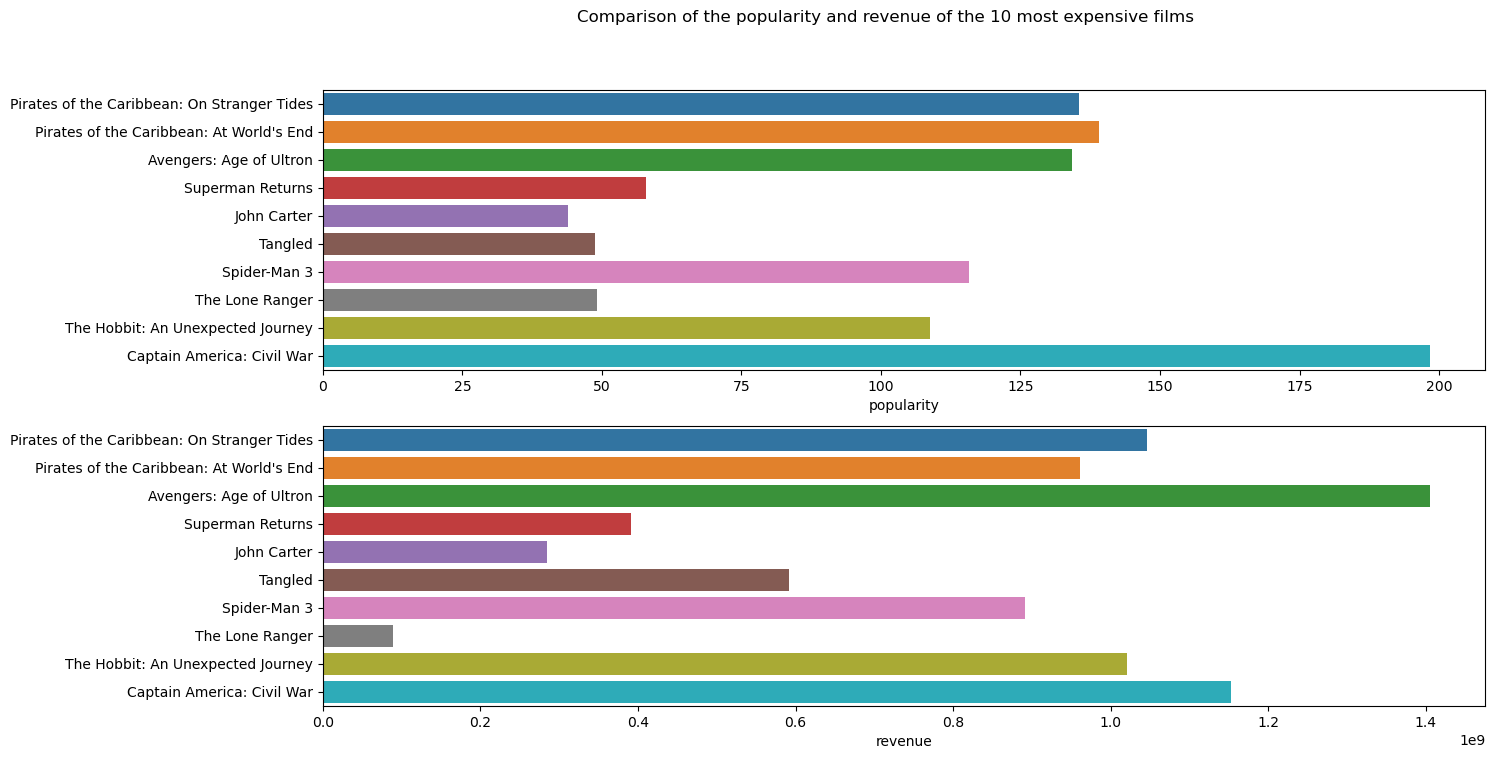

In [13]:

# create a bar plot of the popularity and revenue of the 10 most expensive films
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
fig.suptitle('Comparison of the popularity and revenue of the 10 most expensive films')
sns.barplot(data= most_expensive, y='title', x= 'popularity', ax=axes[0]).set(ylabel= '')
sns.barplot(data= most_expensive, y='title', x= 'revenue', ax=axes[1]).set(ylabel= '')

#### Value for money of the most expensive films
We can see that spending more money on the film does not translate into a more popular film or greater revenue.

The lone ranger performs the worst with respect to revenue with it generating considerably less revenue than the other 10 films

John carter it the least popular film even though it is the 5th most expensive

The lone ranger and John carter seem to be the worst value for money films, whereas Captain America: Civil War seems the best value for money

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

[Text(0, 0.5, ''),
 Text(0.5, 1.0, '5 most profitable and least profitable films')]

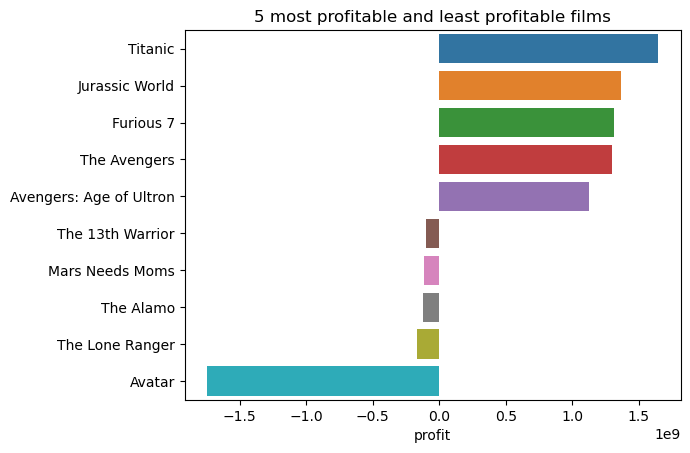

In [14]:
# create a column for the profit of the movie
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Get the 5 least and most profitable films 
max_profit = movies_df.sort_values('profit', ascending = False).head(5)
min_profit = movies_df.sort_values('profit', ascending = False).tail(5)
profit = pd.concat([max_profit,min_profit])

# plot a graph of the profits
sns.barplot(data= profit, y='title', x= 'profit').set(ylabel= '',title= '5 most profitable and least profitable films')

Avatar is the most profitable movie in the data set and the lone ranger is the least profitable movie

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [15]:
# get the 5 most popular titles
movies_df.sort_values(['popularity'], ascending = False).head(5).title

546                    Minions
95                Interstellar
788                   Deadpool
94     Guardians of the Galaxy
127         Mad Max: Fury Road
Name: title, dtype: object

These are the 5 most talked about movies

#### Find Movies which are rated above 7



In [16]:
# get all films with average vote above 7 and sort by vote
movies_df[movies_df.vote_average > 7].sort_values(['vote_average'], ascending = False)



,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
1881,25000000,"['Drama', 'Crime']",278,136.747729,['United States of America'],1994-09-23,28341469,142.0,['English'],The Shawshank Redemption,8.5,8205,1994,3341469
2970,10500000,"['Drama', 'Comedy']",88641,0.037073,['United States of America'],1994-09-02,123509,99.0,['English'],There Goes My Baby,8.5,2,1994,-10376491
3337,6000000,"['Drama', 'Crime']",238,143.659698,['United States of America'],1972-03-14,245066411,175.0,"['English', 'Italiano', 'Latin']",The Godfather,8.4,5893,1972,239066411
1818,22000000,"['Drama', 'History', 'War']",424,104.469351,['United States of America'],1993-11-29,321365567,195.0,"['Deutsch', 'Polski', 'עִבְרִית', 'English']",Schindler's List,8.3,4329,1993,299365567
3232,8000000,"['Thriller', 'Crime']",680,121.463076,['United States of America'],1994-10-08,213928762,154.0,"['English', 'Español', 'Français']",Pulp Fiction,8.3,8428,1994,205928762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,50000000,"['Adventure', 'Comedy', 'Drama']",421,25.237969,['United States of America'],2004-12-10,34808403,119.0,"['English', 'Íslenska', 'Português', 'Français...",The Life Aquatic with Steve Zissou,7.1,775,2004,-15191597
1745,30000000,['Drama'],10024,24.091520,['United States of America'],2009-06-26,95714875,109.0,"['Hrvatski', 'English']",My Sister's Keeper,7.1,598,2009,65714875
3436,6500000,"['Drama', 'History']",28089,8.432401,['United States of America'],2009-11-13,1521261,113.0,"['English', 'Español']",The Messenger,7.1,119,2009,-4978739
1720,28000000,"['Action', 'Crime']",23483,45.054936,"['United Kingdom', 'United States of America']",2010-03-22,96188903,117.0,['English'],Kick-Ass,7.1,4645,2010,68188903


These are all the films that have a rating above 7

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

Text(2014, 17029736072, '2014')

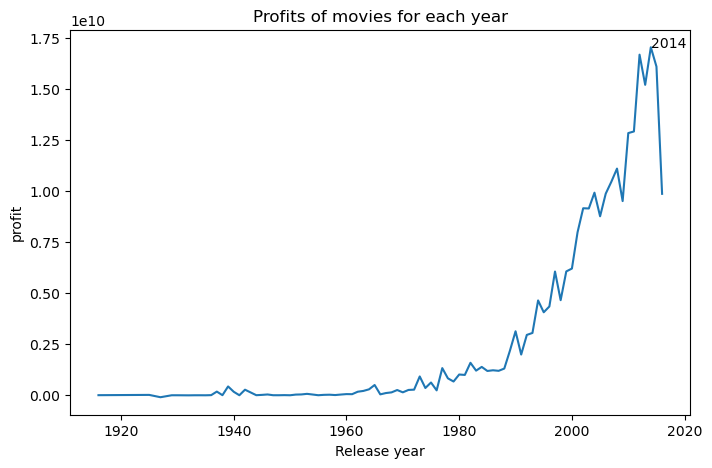

In [17]:
# group by the release years and sum the values
year = movies_df.groupby(by= 'release_year').sum()
# find the year that had the most profit
max_profit_value = year.profit.max()
max_profit_year = year.iloc[0]

# plot the profits for each year and label the max year
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = year, y='profit',x='release_year').set(title= 'Profits of movies for each year', xlabel='Release year')
ax.text(2014,17029736072,'2014')

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

[Text(0.5, 1.0, 'Frequency of movies for each genre')]

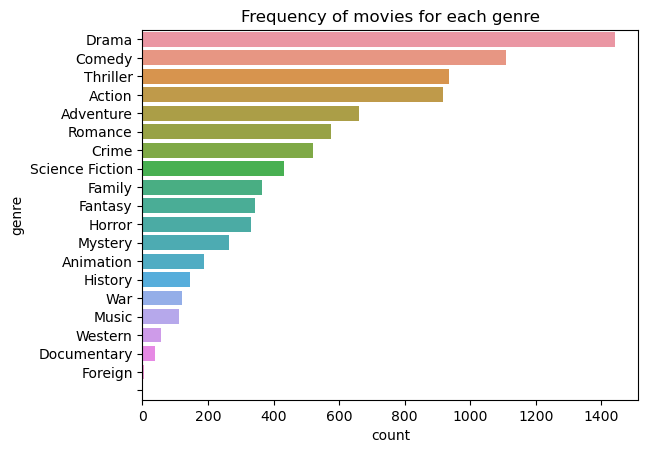

In [18]:
# Get the count of number of time a genre is listed for a movie
genres_freq  = movies_df['genres'].str.split(',').explode().str.strip('[] ').str.strip("''").value_counts()

# reset the index and change the column names
genres_freq = genres_freq.reset_index()
genres_freq.columns = ['genre', 'count']

# Plot bar graph of frequency of genres
sns.barplot(data= genres_freq, y='genre', x= 'count').set(title= 'Frequency of movies for each genre')

[Text(0.5, 1.0, 'Top 10 movie producing countries'),
 Text(0.5, 0, 'number of movies produced')]

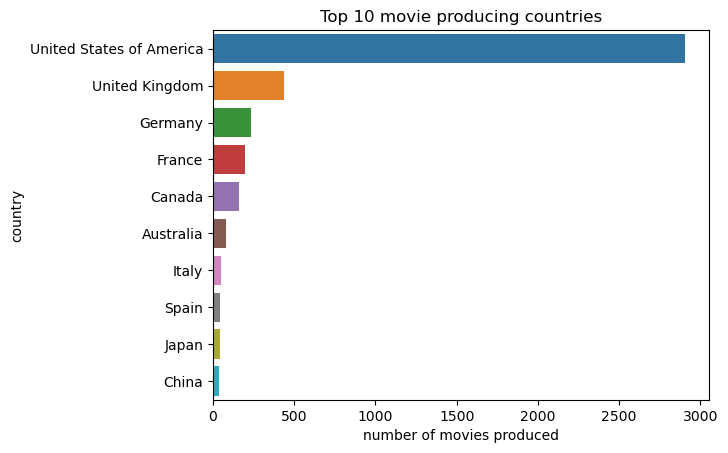

In [19]:
#### Generate three different interesting visualisations with a data story.

# Get the count of number of times a country is listed as the production country
countries_freq  = movies_df['production_countries'].str.split(',').explode().str.strip('[] ').str.strip("''").value_counts()

# reset the index and change the column names
countries_freq = countries_freq.reset_index()
countries_freq.columns = ['country', 'count']

# Plot bar graph of top 10 movie producing countries
sns.barplot(data= countries_freq.head(10), y='country', x= 'count').set(title= 'Top 10 movie producing countries', 
                                                                        xlabel=  'number of movies produced')




The united states is by far the country that produces the most movies

[Text(0.5, 1.0, 'Top 5 most common langauges used in films'),
 Text(0.5, 0, 'number of movies produced')]

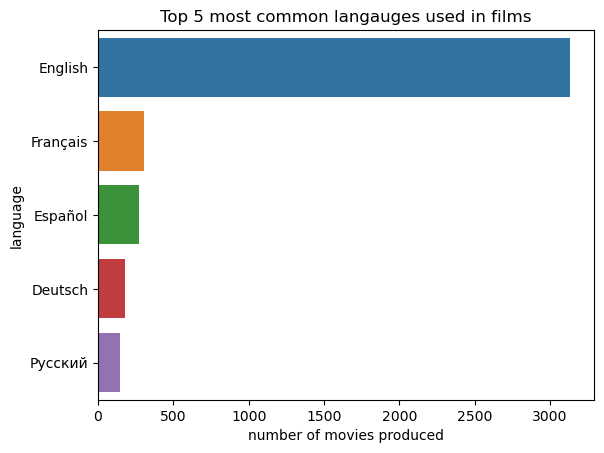

In [24]:
# Get the count of number of times a country is listed as the production country
langauage_freq  = movies_df['spoken_languages'].str.split(',').explode().str.strip('[] ').str.strip("''").value_counts()

# reset the index and change the column names
langauage_freq = langauage_freq.reset_index()
langauage_freq.columns = ['language', 'count']


# Plot bar graph of top 5 movie producing countries
sns.barplot(data= langauage_freq.head(5), y='language', x= 'count').set(title= 'Top 5 most common langauges used in films', 
                                                                      xlabel=  'number of movies produced')


English is by far the most spoken language of all the movies produced

[Text(0.5, 1.0, 'Profit for the 10 best rated films with at least 1000 votes')]

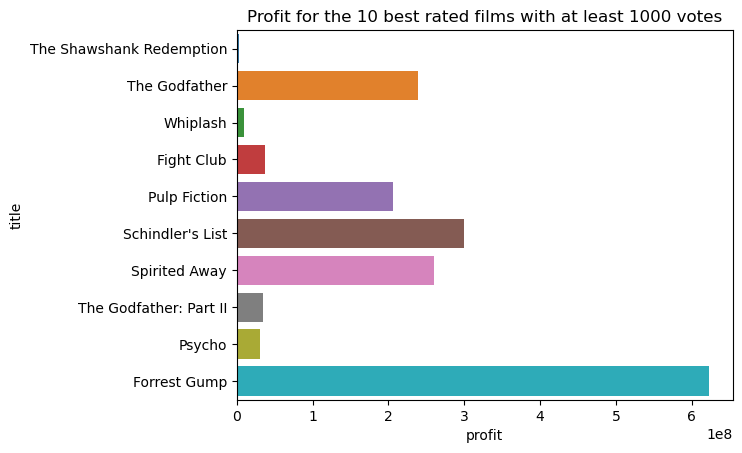

In [25]:
# get 10 top films with the best vote average where they have at least 1000 votes
movies_vote = movies_df[movies_df.vote_count > 1000].sort_values(['vote_average'], ascending = False).head(10)

sns.barplot(data= movies_vote, y= 'title', x='profit').set(title='Profit for the 10 best rated films with at least 1000 votes')

This graph shows that a film being well rated by audiences does not translate into commercial success